■ 日本語評価極性辞書のダウンロード：

In [ ]:
! curl http://www.cl.ecei.tohoku.ac.jp/resources/sent_lex/pn.csv.m3.120408.trim > pn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  676k  100  676k    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1228k


■ ダウンロードしたネガポジ辞書データの読み込み：

In [1]:
import csv
np_dic = {}
# utf-8の文字コードを指定してファイルを開く
fp = open("pn.csv", "rt", encoding="utf-8")
# タブ区切り形式でCSVデータを読む
reader = csv.reader(fp, delimiter='\t')
# 各行ごとに処理を行う
for i, row in enumerate(reader):
  # 行ごとのデータは以下の形式であり、
  # 愛情	p	〜がある・高まる（存在・性質）
  # 冒頭の見出し語を name に、
  # 次の p or n or e などを result に格納
  name = row[0]
  result = row[1]
  np_dic[name] = result
  if i % 1000 == 0: print(i)
print("ok")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
ok


■ 読み込んだ辞書データの確認：

In [2]:
print(np_dic["激怒"])
print(np_dic["苦情"])
print(np_dic["糞"])
print(np_dic["喜び"])
print(np_dic["勝利"])
print(np_dic["上品"])
print(np_dic["商品"])
print(np_dic["奔走"])
print(np_dic["時間"])


n
n
n
p
p
p
e
e
e


■ Janomeのインストール：

In [ ]:
!pip install janome

     |████████████████████████████████| 19.7 MB 1.3 MB/s 


■ 文章に対してネガポジ分析を行うコード：


In [3]:
# Janomeのロード
from janome.tokenizer import Tokenizer

# Tokenizerインスタンスの生成
tokenizer = Tokenizer()

# 入力した文字列に対して、
# ポジティブ単語数、ネガティブ単語数、全単語数、の3つを返す
def np_rate(input_str):
  pos_count  = 0
  neg_count  = 0
  word_count = 0
  tokens = tokenizer.tokenize(input_str)
  for token in tokens:
    base_form = token.base_form # 原形/基本形
    # ネガポジ辞書に存在するか確認して対応する方を1増やす
    if base_form in np_dic:
      # 単語を辞書のキーとして、そのバリューが p か n か確認する
      if np_dic[base_form] == "p" :
        pos_count += 1
        # どんな言葉がポジ判定されてるか確認用（あとでコメントアウト）
        print("POS:" + base_form)
      if np_dic[base_form] == "n" :
        neg_count += 1
        # どんな言葉がネガ判定されてるか確認用（あとでコメントアウト）
        print("NEG:" + base_form)
    # 存在しようがしまいが、単語数を1増やす
    word_count += 1
  return pos_count, neg_count, word_count


print(np_rate("メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。"))


NEG:激怒
NEG:暴虐
(0, 2, 24)


【※ ここで付録を参照し、記載のコードを実行してください。】  
の、付録のコード  
■ 青空文庫からのダウンロード＆加工用共通コード：  

In [5]:
# 青空文庫からのダウンロードzip展開＆テキスト抽出

import re
import zipfile
import urllib.request
import os.path,glob
# 青空文庫のURLから小説テキストデータを得る関数
def get_flat_text_from_aozora(zip_url):
  # zipファイル名の取得
  zip_file_name = re.split(r'/', zip_url)[-1]
  print(zip_file_name)

  # 既にダウンロード済みか確認後、URLからファイルを取得
  if not os.path.exists(zip_file_name):
    print('Download URL = ',zip_url)
    data = urllib.request.urlopen(zip_url).read()
    with open(zip_file_name, mode="wb") as f:
      f.write(data)
  else:
    print('May be already exists')

  # 拡張子を除いた名前で、展開用フォルダを作成
  dir, ext = os.path.splitext(zip_file_name)
  if not os.path.exists(dir):
    os.makedirs(dir)

  # zipファイルの中身を全て、展開用フォルダに展開
  unzipped_data = zipfile.ZipFile(zip_file_name, 'r')
  unzipped_data.extractall(dir)
  unzipped_data.close()

  # zipファイルの削除
  os.remove(zip_file_name)
  # 注：展開フォルダの削除は入れていない

  # テキストファイル(.txt)の抽出
  wild_path = os.path.join(dir,'*.txt')
  # テキストファイルは原則1つ同梱。最初の1つを取得
  txt_file_path = glob.glob(wild_path)[0]

  print(txt_file_path)
  # 青空文庫はshift_jisのためデコードしてutf8にする
  binary_data = open(txt_file_path, 'rb').read()
  main_text = binary_data.decode('shift_jis')

  # 取得したutf8のテキストデータを返す
  return main_text


# 青空文庫のデータを加工して扱いやすくするコード

# 外字データ変換のための準備
# 外字変換のための対応表（jisx0213対応表）のダウンロード
# ※事前にダウンロード済みであれば飛ばしてもよい
!wget http://x0213.org/codetable/jisx0213-2004-std.txt

import re

# 外字変換のための対応表（jisx0213対応表）の読み込み
with open('jisx0213-2004-std.txt') as f:
  #ms = (re.match(r'(\d-\w{4})\s+U\+(\w{4})', l) for l in f if l[0] != '#')
  # 追加：jisx0213-2004-std.txtには5桁のUnicodeもあるため対応
  ms = (re.match(r'(\d-\w{4})\s+U\+(\w{4,5})', l) for l in f if l[0] != '#')
  gaiji_table = {m[1]: chr(int(m[2], 16)) for m in ms if m}

# 外字データの置き換えのための関数
def get_gaiji(s):
  # ※［＃「弓＋椁のつくり」、第3水準1-84-22］の形式を変換
  m = re.search(r'第(\d)水準\d-(\d{1,2})-(\d{1,2})', s)
  if m:
    key = f'{m[1]}-{int(m[2])+32:2X}{int(m[3])+32:2X}'
    return gaiji_table.get(key, s)
  # ※［＃「身＋單」、U+8EC3、56-1］の形式を変換
  m = re.search(r'U\+(\w{4})', s)
  if m:
    return chr(int(m[1], 16))
  # ※［＃二の字点、1-2-22］、［＃感嘆符二つ、1-8-75］の形式を変換
  m = re.search(r'.*?(\d)-(\d{1,2})-(\d{1,2})', s)
  if m:
    key = f'{int(m[1])+2}-{int(m[2])+32:2X}{int(m[3])+32:2X}'
    return gaiji_table.get(key, s)
  # 不明な形式の場合、元の文字列をそのまま返す
  return s

# 青空文庫の外字データ置き換え＆注釈＆ルビ除去などを行う加工関数
def flatten_aozora(text):
  # textの外字データ表記を漢字に置き換える処理
  text = re.sub(r'※［＃.+?］', lambda m: get_gaiji(m[0]), text)
  # 注釈文や、ルビなどの除去
  text = re.split(r'\-{5,}', text)[2]
  text = re.split(r'底本：', text)[0]
  text = re.sub(r'《.+?》', '', text)
  text = re.sub(r'［＃.+?］', '', text)
  text = text.strip()
  return text


# 複数ファイルのダウンロードや加工を一括実行する関数

import time
# ZIP-URLのリストから全てのデータをダウンロード＆加工する関数
def get_all_flat_text_from_zip_list(zip_list):
  all_flat_text = ""
  for zip_url in zip_list:
    # ダウンロードや解凍の失敗があり得るためTry文を使う
    # 十分なデータ量があるため数件の失敗はスキップでよい
    try:
      # 青空文庫からダウンロードする関数を実行
      aozora_dl_text = get_flat_text_from_aozora(zip_url)
      # 青空文庫のテキストを加工する関数を実行
      flat_text = flatten_aozora(aozora_dl_text)
      # 結果を追記して改行。
      all_flat_text += flat_text + ("\n")
      print(zip_url+" : 取得＆加工完了")
    except:
      # エラー時の詳細ログが出るおまじない
      import traceback
      traceback.print_exc()
      print(zip_url+" : 取得or解凍エラーのためスキップ")

    # 青空文庫サーバに負荷をかけすぎないように１秒待ってから次の小説へ
    time.sleep(1)

  # 全部がつながった大きなテキストデータを返す
  return all_flat_text



'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


■ 走れメロスのデータをダウンロード＆加工して使いやすく：

In [6]:
# ダウンロードしたいURLを入力する
ZIP_URL = 'https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip'

# 青空文庫からダウンロードする関数を実行
aozora_dl_text = get_flat_text_from_aozora(ZIP_URL)

# 途中経過を見たい場合以下のコメントを解除
# 冒頭1000文字を出力
# print(aozora_dl_text[0:1000])

# 青空文庫のテキストを加工する関数を実行
flat_text = flatten_aozora(aozora_dl_text)

# 冒頭1000文字を出力
print(flat_text[0:1000])


1567_ruby_4948.zip
Download URL =  https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip
1567_ruby_4948\hashire_merosu.txt
メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」
「たくさんの人を殺したのか。」
「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」
「おどろいた。国王は乱心か

■ 2種類の折れ線グラフを描くコード：

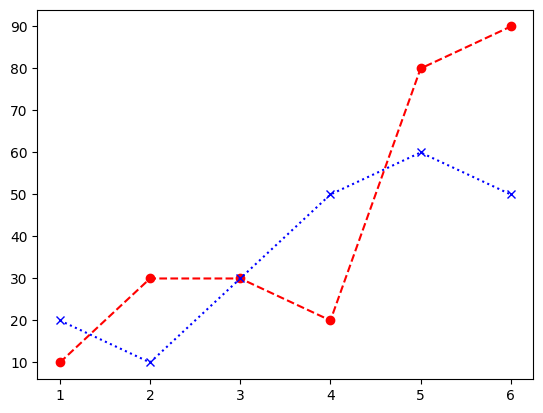

In [7]:
%matplotlib inline
# ↑グラフを表示するためのおまじない
# Colaboratoryで実行する場合はなくても問題ありません

import matplotlib.pyplot as plt

# X座標
x =  [ 1,  2,  3,  4 , 5,  6]
# Y座標は２種類
y1 = [10, 30, 30, 20, 80, 90]
y2 = [20, 10, 30, 50, 60, 50]

# グラフのフォーマットを指定してプロット
plt.plot(x, y1, marker="o", color = "red", linestyle = "--")
plt.plot(x, y2, marker="x", color = "blue",  linestyle = ":")


■ メロスの感情を時系列でグラフ化するコード：

1567_ruby_4948.zip
Download URL =  https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip
1567_ruby_4948\hashire_merosu.txt
NEG:激怒
NEG:暴虐
NEG:邪悪
NEG:内気
POS:楽しみ
NEG:不安
POS:賑やか
NEG:疑い
NEG:激怒
NEG:騒ぎ
NEG:暴君
POS:威厳
NEG:蒼白
NEG:暴君
NEG:憫笑
NEG:孤独
NEG:悪徳
POS:忠誠
POS:正当
POS:心構え
NEG:暴君
POS:平和
POS:平和
POS:地位
NEG:嘲笑
NEG:罪
POS:平和
POS:清らか
NEG:視線
POS:情
NEG:暴君
NEG:嘘
POS:友人
POS:友人
NEG:残虐
NEG:生意気
NEG:嘘つき
NEG:磔刑
POS:正直
NEG:罪
POS:永遠
POS:いのち
POS:大事
NEG:暴君
NEG:急ぎ
POS:陽
NEG:疲労
NEG:困憊
NEG:無理
POS:綺麗
POS:眠り
POS:明日
POS:明日
NEG:不吉
POS:陽気
POS:喜色
POS:華やか
POS:一生
NEG:未練
POS:情
NEG:呆然
POS:歓喜
POS:大切
NEG:嘘
POS:誇り
POS:大丈夫
POS:十分
POS:信実
POS:名誉
POS:大丈夫
NEG:未練
POS:好き
NEG:災難
NEG:氾濫
NEG:破壊
NEG:限り
NEG:影
POS:友達
POS:ため
NEG:煽り
POS:愛
POS:誠
POS:偉大
POS:力
POS:発揮
POS:力
POS:獅子奮迅
NEG:哀れ
POS:見事
NEG:むだ
POS:陽
NEG:山賊
POS:陽
POS:いのち
POS:命
POS:いのち
NEG:山賊
NEG:気の毒
POS:正義
POS:ため
NEG:一撃
NEG:隙
NEG:疲労
POS:まとも
NEG:眩暈
NEG:山賊
POS:真
POS:勇者
POS:情
NEG:不信
POS:前進
NEG:疲労
POS:勇者
POS:根性
NEG:不信
POS:愛
POS:信実
POS:大事
NEG:不幸
NEG:中途
NEG:疑惑
POS:無心
POS:信実
NEG:急ぎ
NEG

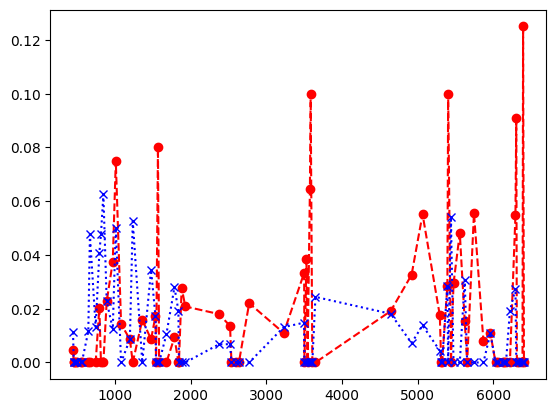

In [8]:
# ダウンロードしたいURLを入力する
ZIP_URL = 'https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip'

# ダウンロード＆テキスト取得
aozora_dl_text = get_flat_text_from_aozora(ZIP_URL)

# タグや外字などのデータを加工
flat_text = flatten_aozora(aozora_dl_text)

# フラットなテキストを「改行コード」で区切ってリスト形式にする
mero_list = flat_text.split('\n')

# グラフ作成用のx軸,　y軸
# X座標（物語の進行の時間軸として、それまでの単語総数を入れる）
x =  []
# Y座標は２種類＝y1にポジティブ度合い、y2にネガティブ度合いとする
y1 = []
y2 = []

total_word_count = 0
# 作ったリストの各要素に対して処理を行う
for mero_str in mero_list:
  # リストの中身＝文字列に対してネガポジ分析を行う。
  pos_count, neg_count, word_count = np_rate(mero_str)
  # 単語数が０となる行があった場合、その行を飛ばす（０除算防止）
  if word_count <1 :
    continue
  # 全単語数に対するポジティブの比率を、リストに追加する
  y1.append(pos_count/word_count)
  # 全単語数に対するポジティブの比率を、リストに追加する
  y2.append(neg_count/word_count)
  # これまでに出てきた単語数の合計をX軸とする
  total_word_count += word_count
  x.append(total_word_count)

# グラフのフォーマットを指定してプロット
plt.plot(x, y1, marker="o", color = "red", linestyle = "--")
plt.plot(x, y2, marker="x", color = "blue",  linestyle = ":")


■ 注文の多い料理店：

※ZIP_URL を下記に書き換えているのみ。

https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip

43754_ruby_17594.zip
Download URL =  https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip
43754_ruby_17594\chumonno_oi_ryoriten.txt
NEG:獣
POS:痛快
POS:専門
NEG:めまい
NEG:損害
NEG:損害
POS:立派
POS:立派
POS:金
POS:意味
POS:金
POS:歓迎
POS:歓迎
POS:歓迎
NEG:変
NEG:泥
POS:きれい
NEG:泥
NEG:否
POS:元気
NEG:変
POS:立派
POS:予防
POS:周到
NEG:風邪
NEG:気の毒
POS:立派
NEG:ご苦労
POS:結構
POS:おまけ
NEG:気の毒
NEG:間抜け
NEG:骨
NEG:嫌い
POS:ため
POS:元気
POS:専門
POS:安心


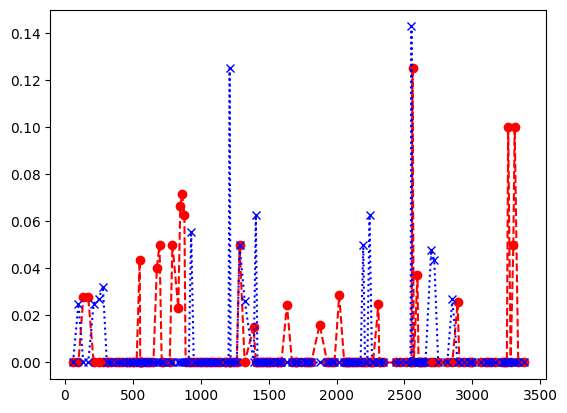

In [9]:
# ダウンロードしたいURLを入力する
ZIP_URL = 'https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip'

# ダウンロード＆テキスト取得
aozora_dl_text = get_flat_text_from_aozora(ZIP_URL)

# タグや外字などのデータを加工
flat_text = flatten_aozora(aozora_dl_text)

# フラットなテキストを「改行コード」で区切ってリスト形式にする
mero_list = flat_text.split('\n')

# グラフ作成用のx軸,　y軸
# X座標（物語の進行の時間軸として、それまでの単語総数を入れる）
x =  []
# Y座標は２種類＝y1にポジティブ度合い、y2にネガティブ度合いとする
y1 = []
y2 = []

total_word_count = 0
# 作ったリストの各要素に対して処理を行う
for mero_str in mero_list:
  # リストの中身＝文字列に対してネガポジ分析を行う。
  pos_count, neg_count, word_count = np_rate(mero_str)
  # 単語数が０となる行があった場合、その行を飛ばす（０除算防止）
  if word_count <1 :
    continue
  # 全単語数に対するポジティブの比率を、リストに追加する
  y1.append(pos_count/word_count)
  # 全単語数に対するポジティブの比率を、リストに追加する
  y2.append(neg_count/word_count)
  # これまでに出てきた単語数の合計をX軸とする
  total_word_count += word_count
  x.append(total_word_count)

# グラフのフォーマットを指定してプロット
plt.plot(x, y1, marker="o", color = "red", linestyle = "--")
plt.plot(x, y2, marker="x", color = "blue",  linestyle = ":")


■ 蜘蛛の糸：

※ZIP_URL を下記に書き換えているのみ。

https://www.aozora.gr.jp/cards/000879/files/92_ruby_164.zip

92_ruby_164.zip
Download URL =  https://www.aozora.gr.jp/cards/000879/files/92_ruby_164.zip
92_ruby_164\kumono_ito.txt
POS:釈迦
POS:釈迦
NEG:地獄
NEG:針
POS:景色
NEG:覗き
NEG:地獄
NEG:悪事
POS:命
POS:命
NEG:急
POS:釈迦
NEG:地獄
NEG:地獄
POS:幸い
POS:翡翠
POS:釈迦
NEG:地獄
NEG:地獄
NEG:針
NEG:針
NEG:墓
NEG:地獄
POS:力
NEG:地獄
NEG:針
POS:しっかり
POS:一生懸命
NEG:地獄
POS:容易
NEG:中途
POS:一生懸命
NEG:針
NEG:地獄
NEG:地獄
NEG:大変
NEG:急
NEG:中途
POS:釈迦
NEG:地獄
NEG:無慈悲
NEG:罰
NEG:地獄
POS:釈迦
NEG:頓着
POS:釈迦


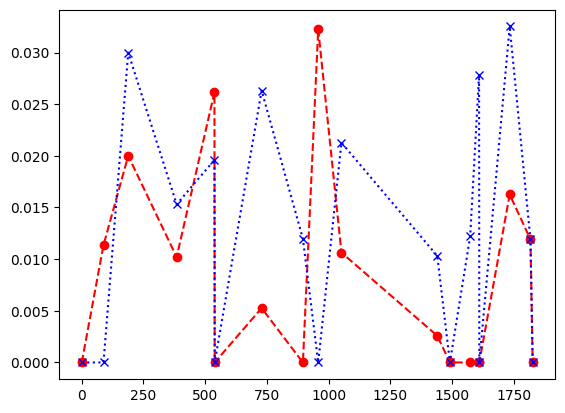

In [10]:
# ダウンロードしたいURLを入力する
ZIP_URL = 'https://www.aozora.gr.jp/cards/000879/files/92_ruby_164.zip'

# ダウンロード＆テキスト取得
aozora_dl_text = get_flat_text_from_aozora(ZIP_URL)

# タグや外字などのデータを加工
flat_text = flatten_aozora(aozora_dl_text)

# フラットなテキストを「改行コード」で区切ってリスト形式にする
mero_list = flat_text.split('\n')

# グラフ作成用のx軸,　y軸
# X座標（物語の進行の時間軸として、それまでの単語総数を入れる）
x =  []
# Y座標は２種類＝y1にポジティブ度合い、y2にネガティブ度合いとする
y1 = []
y2 = []

total_word_count = 0
# 作ったリストの各要素に対して処理を行う
for mero_str in mero_list:
  # リストの中身＝文字列に対してネガポジ分析を行う。
  pos_count, neg_count, word_count = np_rate(mero_str)
  # 単語数が０となる行があった場合、その行を飛ばす（０除算防止）
  if word_count <1 :
    continue
  # 全単語数に対するポジティブの比率を、リストに追加する
  y1.append(pos_count/word_count)
  # 全単語数に対するポジティブの比率を、リストに追加する
  y2.append(neg_count/word_count)
  # これまでに出てきた単語数の合計をX軸とする
  total_word_count += word_count
  x.append(total_word_count)

# グラフのフォーマットを指定してプロット
plt.plot(x, y1, marker="o", color = "red", linestyle = "--")
plt.plot(x, y2, marker="x", color = "blue",  linestyle = ":")
